In [1]:
import pandas as pd
import seaborn as sns
sns.set_theme()
tips = pd.read_csv("https://milliams.com/courses/data_analysis_python/tips.csv")
tips.head()
#tips[["total_bill", "tip"]].head()

,total_bill,tip,day,time,size
0,16.99,0.71,Sun,Dinner,2
1,10.34,1.16,Sun,Dinner,3
2,21.01,2.45,Sun,Dinner,3
3,23.68,2.32,Sun,Dinner,2
4,24.59,2.53,Sun,Dinner,4


In [2]:
tips["total_bill"].sum()
tips["total_bill"].mean()
tips["total_bill"].max()
tips["total_bill"].idxmax()

170

In [3]:
tips["percent_tip"] = (tips["tip"] / tips["total_bill"])*100
tips.head()

,total_bill,tip,day,time,size,percent_tip
0,16.99,0.71,Sun,Dinner,2,4.178929
1,10.34,1.16,Sun,Dinner,3,11.218569
2,21.01,2.45,Sun,Dinner,3,11.661114
3,23.68,2.32,Sun,Dinner,2,9.797297
4,24.59,2.53,Sun,Dinner,4,10.288735


In [4]:
tips[(tips["day"] == "Sat") & (tips["total_bill"] < 8)]

,total_bill,tip,day,time,size,percent_tip
67,3.07,0.70,Sat,Dinner,1,22.801303
111,7.25,0.70,Sat,Dinner,1,9.655172
218,7.74,1.01,Sat,Dinner,2,13.049096


## Seaborn

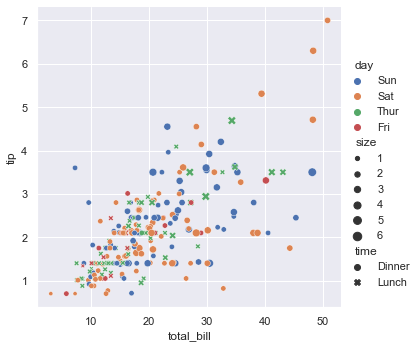

In [5]:
#sns.relplot(data=tips, x="total_bill", y="tip")  #plot 
#sns.relplot(data=tips, x="total_bill", y="tip", hue="day", style="day")
sns.relplot(data=tips, x="total_bill", y="tip", hue="day", style="time", size="size")  # color plot

### Plotting distributions

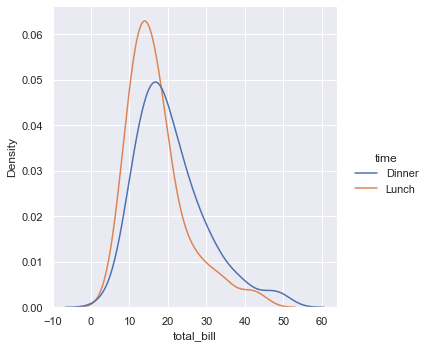

In [6]:
#sns.displot(data=tips, x="total_bill")  # 直方
#sns.displot(data=tips, x="total_bill", col="time")  #時間分離
#sns.displot(data=tips, x="total_bill", hue="time", stat="density", common_norm=False)  # hue 時間區分直方疊圖
sns.displot(data=tips, x="total_bill",  hue="time", kind="kde", common_norm=False)      # hue 時間區分線性疊圖

### Plotting catplot

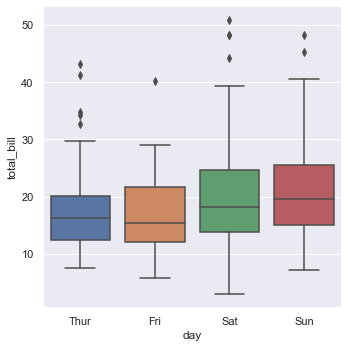

In [7]:
#sns.catplot(data=tips, x="day", y="total_bill")  #散佈圖
#sns.catplot(data=tips, x="day", y="total_bill", order=["Thur", "Fri", "Sat", "Sun"])  #排序
sns.catplot(data=tips, x="day", y="total_bill", order=["Thur", "Fri", "Sat", "Sun"], kind="box") #廂型圖

## sns.load_dataset("tips")

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks")
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


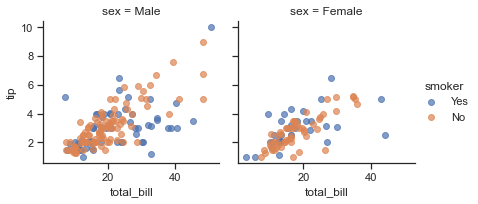

In [9]:
g=sns.FacetGrid(tips,col="sex", hue="smoker")
g.map(plt.scatter, "total_bill", "tip", alpha=.7)
g.add_legend()
plt.show()

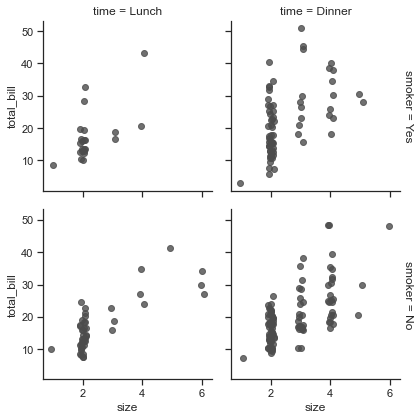

In [10]:
g=sns.FacetGrid(tips,row="smoker", col="time",margin_titles=True)
g.map(sns.regplot, "size", "total_bill", color =".3",fit_reg=False, x_jitter=.1)
plt.show()

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


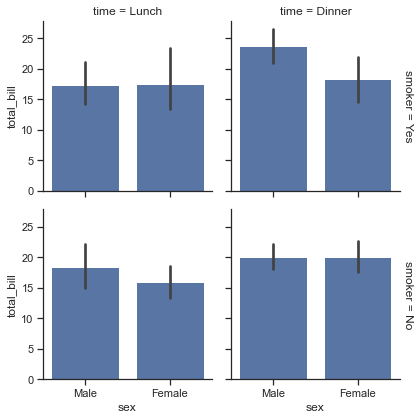

In [11]:
g=sns.FacetGrid(tips,row="smoker", col="time",margin_titles=True)
g.map(sns.barplot, "sex", "total_bill")
plt.show()

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, Fu

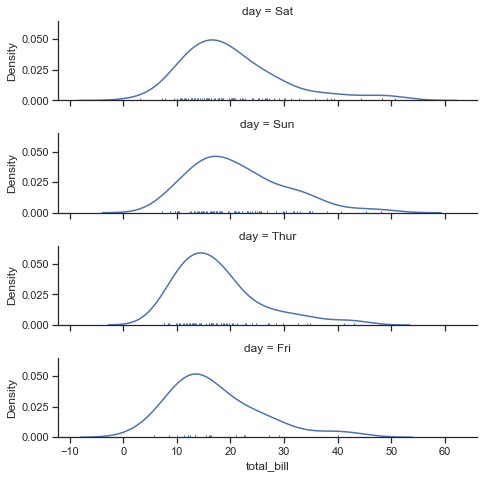

In [12]:
ordered_days = tips.day.value_counts().index
g = sns.FacetGrid(tips, row="day",row_order=ordered_days,height=1.7,aspect=4)
g.map(sns.distplot,"total_bill",hist=False,rug=True)
plt.show()

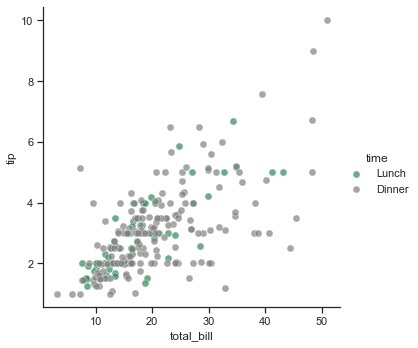

In [13]:
pal = dict(Lunch="seagreen",Dinner="gray")
g = sns.FacetGrid(tips, hue="time",palette=pal,height=5)
g.map(plt.scatter,"total_bill","tip",s=50,alpha=.7,linewidth=.5,edgecolor="white")      
g.add_legend()
plt.show()

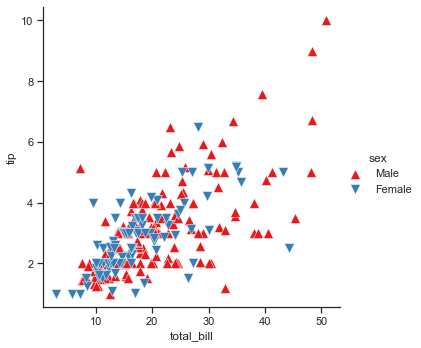

In [14]:
g = sns.FacetGrid(tips, hue="sex",palette="Set1",height=5,hue_kws={"marker":["^","v"]})
g.map(plt.scatter,"total_bill","tip",s=100,linewidth=.5,edgecolor="white")      
g.add_legend()
plt.show()

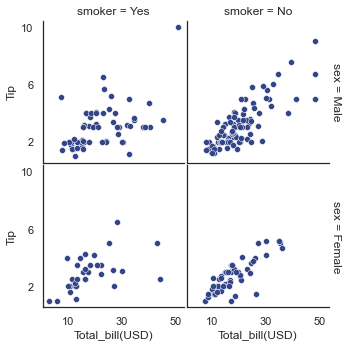

In [15]:
with sns.axes_style("white"):
    g=sns.FacetGrid(tips,row="sex",col="smoker",margin_titles=True,height=2.5)

g.map(plt.scatter,"total_bill","tip",color="#334488",edgecolor="white",lw=.5)
g.set_axis_labels("Total_bill(USD)","Tip")
g.set(xticks=[10,30,50],yticks=[2,6,10])
g.fig.subplots_adjust(wspace=.02,hspace=.02)
plt.show()

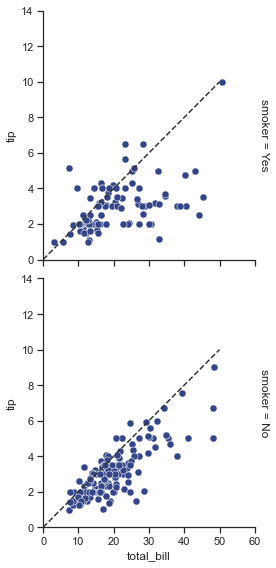

In [16]:
g=sns.FacetGrid(tips,row="smoker",margin_titles=True,height=4)

g.map(plt.scatter,"total_bill","tip",color="#334488",edgecolor="white",s=50,lw=.5)

for ax in g.axes.flat:
    ax.plot((0,50),(0,.2*50),c=".2",ls="--")

g.set(xlim=(0,60),ylim=(0,14))
plt.show()

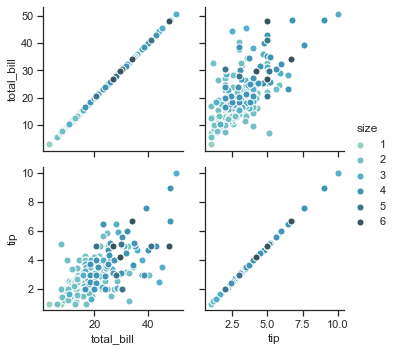

In [17]:
g=sns.PairGrid(tips,hue="size",palette="GnBu_d")
g.map(plt.scatter,s=50,edgecolor="white")
g.add_legend()
plt.show()

## 13.11 Bar Plots with Seaborn

In [18]:
import pandas as pd
import seaborn as sns
frame = pd.read_csv('input/pd-yearsale.csv' )
frame.head()

,year,quarters,sale1,sale2,sale3
0,2010,A,200,258,592
1,2010,B,328,664,606
2,2010,C,870,249,918
3,2010,D,209,971,629
4,2011,A,348,863,929


We can use seaborn library to create a bar plot using the function **sns.barplot()**:

<AxesSubplot:>

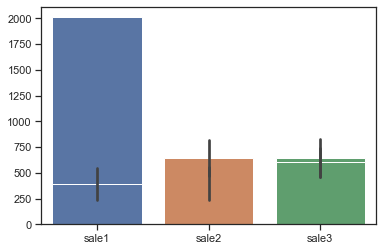

In [19]:
sns.barplot(data = frame)
sns.barplot(data = frame[['sale1','sale2','sale3']])
sns.barplot(data = frame[['sale1','sale2','sale3']], ci = False) #To remove confidence interval

<AxesSubplot:xlabel='year', ylabel='sale1'>

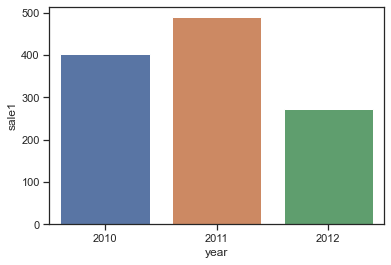

In [20]:
sns.barplot(x= frame.year, y = frame.sale1, ci = False)  # add change
sns.barplot(x= 'year', y = 'sale1', data= frame, ci = False)

We can also you pass x and y using **dataframe indexing**, like this:

<AxesSubplot:xlabel='sale1', ylabel='year'>

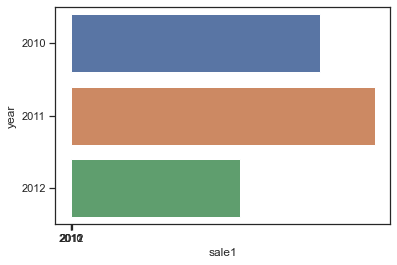

In [21]:
sns.barplot(x= frame['year'], y = frame['sale1'], ci = False)
sns.barplot(x = frame['sale1'], y= frame['year'], orient = 'h', ci= False)

We can also use the **hue** option (which enables us to split the bars by an additional categorical variable). Here we splitted the bars by the categorical variable 'quarters':

<AxesSubplot:xlabel='year', ylabel='sale1'>

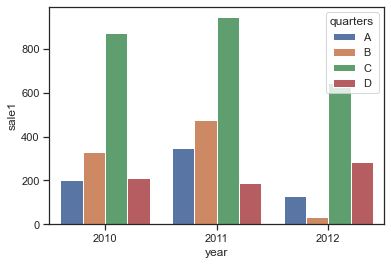

In [22]:
sns.barplot( x= frame['year'], y = frame['sale1'], hue = frame['quarters'])

## Histograms and Density Plots

In [23]:
import pandas as pd
import seaborn as sns

frame = pd.read_csv('input/pd-seaborn.csv')
frame.head()

,age,wage
0,39.0,48.0
1,28.0,44.0
2,28.0,49.0
3,36.0,56.0
4,30.0,24.0


<AxesSubplot:ylabel='Frequency'>

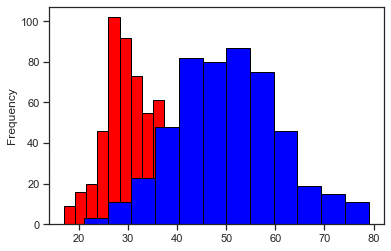

In [24]:
#frame['age'].plot.hist(bins = 12)
frame['age'].plot.hist(bins = 12, color = 'red', edgecolor = 'black', linewidth = 1)
frame['wage'].plot.hist(bins = 12, color = 'blue', edgecolor = 'black', linewidth = 1)

To create a density plot, we use the function **plot.density()**:

<AxesSubplot:ylabel='Density'>

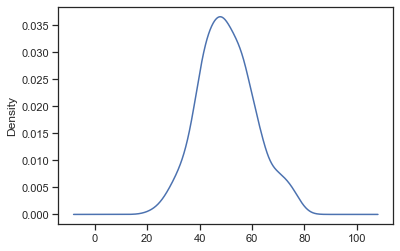

In [25]:
frame['wage'].plot.density()

In [26]:
# sns.boxplot(x=df2["class"], y=df2["Petal Width"])  #盒狀圖
# sns.violinplot(x=df2["Petal Length"], y=df2["Petal Width"]) # 提琴圖
# sns.regplot(x=df2["Petal Length"], y=df2["Petal Width"],ci=10) # 分佈圖

In [27]:
# data.describe().style.background_gradient(cmap = 'Greens')
# data.isnull().sum()

## Example

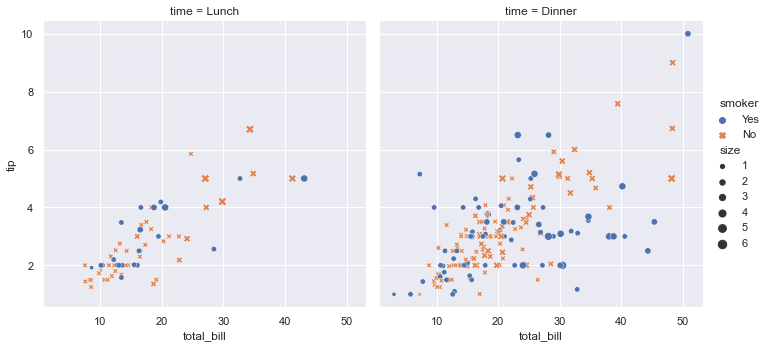

In [28]:
sns.set()
tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip", col="time",
            hue="smoker", style="smoker", size="size",data=tips);

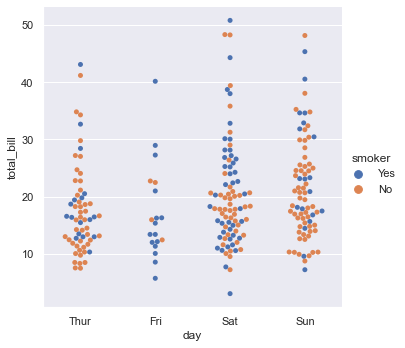

In [29]:
sns.catplot(x="day", y="total_bill", hue="smoker",kind="swarm", data=tips);

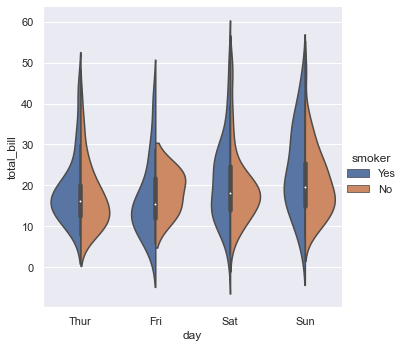

In [30]:
sns.catplot(x="day", y="total_bill", hue="smoker",kind="violin", split=True, data=tips);

In [31]:
# Ploting with x and y
import numpy as np
import pandas as pd
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.rand(500, 6),0)

In [32]:
data = np.random.multivariate_normal([0,0], [[5,2],[2,2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

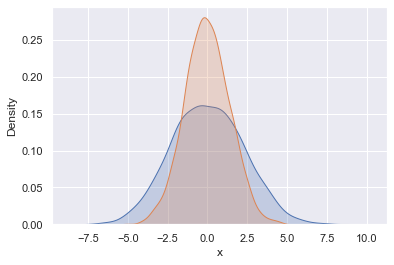

In [33]:

# For KD Plot with normal distrubution 

for col in 'xy':
    sns.kdeplot(data[col], shade=True)

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='y', ylabel='Density'>

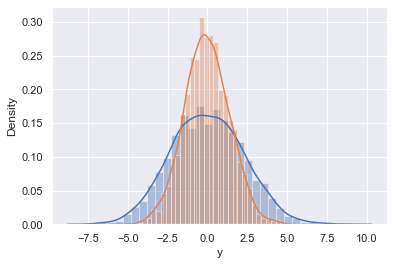

In [34]:
sns.distplot(data['x'])
sns.distplot(data['y'])

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


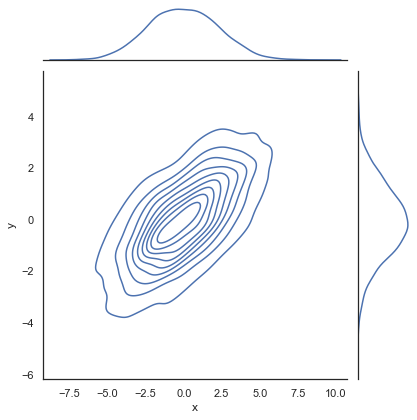

In [35]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind="kde")


In [36]:
# We can also plot a joint plot using seaborn

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


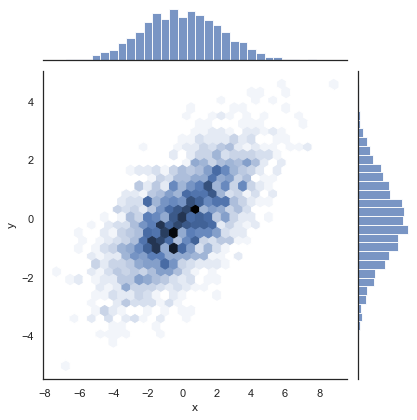

In [37]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind="hex")

In [38]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


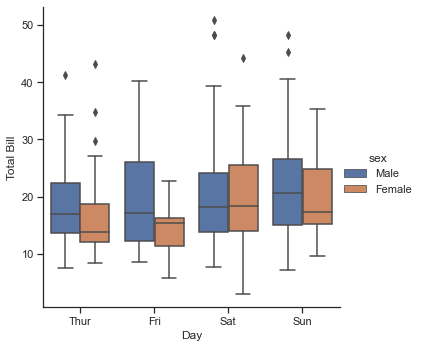

In [39]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("day", "total_bill", "sex", data=tips,kind="box")
    g.set_axis_labels("Day","Total Bill");

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


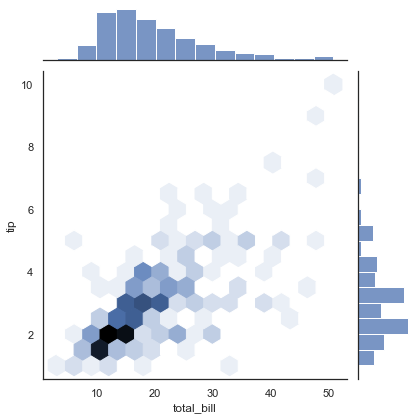

In [40]:
with sns.axes_style('white'):
    sns.jointplot("total_bill", "tip", data=tips, kind="hex")


/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


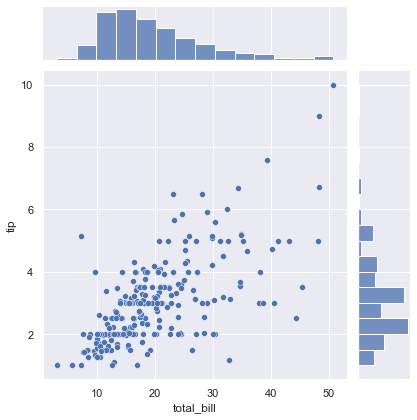

In [41]:
sns.jointplot("total_bill", "tip", data=tips)

In [42]:
planets = sns.load_dataset("planets")
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


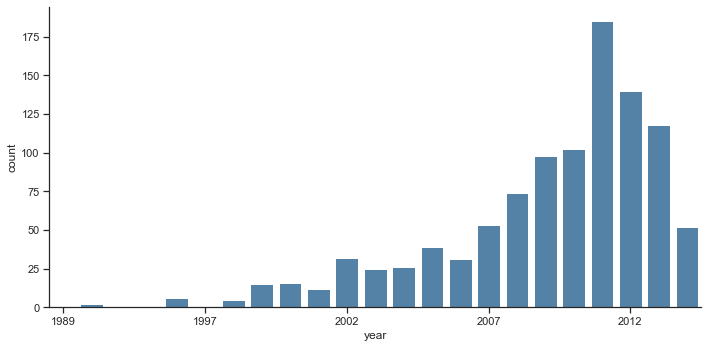

In [43]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("year", data=planets, aspect = 2,kind="count", color="steelblue")
    g.set_xticklabels(step=5)